In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('German_Credit.csv', header=None)
df.shape
df.dtypes

0     object
1      int64
2     object
3     object
4      int64
5     object
6     object
7      int64
8     object
9     object
10     int64
11    object
12     int64
13    object
14    object
15     int64
16    object
17     int64
18    object
19    object
20     int64
dtype: object

In [3]:
# Assigning column names. Column names were given with additional information

df.columns = [
    'Status of checking account',
    'Duration in month',
    'Credit histroy',
    'Purpose',
    'Credit amount',
    'Savings account/bonds',
    'Present employee since',
    'Installment rate in % of income',
    'Personal status and sex',
    'Other debtors',
    'Present resident since',
    'Property',
    'Age in years',
    'Other installment plans',
    'Housing',
    'Nr of existing credits',
    'Employment status',
    'Nr of people  liable to provide maintenance for',
    'Telephone nr',
    'Foreign worker?',
    'Credit risk',
]
df.head()


,Status of checking account,Duration in month,Credit histroy,Purpose,Credit amount,Savings account/bonds,Present employee since,Installment rate in % of income,Personal status and sex,Other debtors,...,Property,Age in years,Other installment plans,Housing,Nr of existing credits,Employment status,Nr of people liable to provide maintenance for,Telephone nr,Foreign worker?,Credit risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
df.dtypes

Status of checking account                         object
Duration in month                                   int64
Credit histroy                                     object
Purpose                                            object
Credit amount                                       int64
Savings account/bonds                              object
Present employee since                             object
Installment rate in % of income                     int64
Personal status and sex                            object
Other debtors                                      object
Present resident since                              int64
Property                                           object
Age in years                                        int64
Other installment plans                            object
Housing                                            object
Nr of existing credits                              int64
Employment status                                  object
Nr of people  

In [5]:
for col in df.select_dtypes(include='object'): #selects all categories called object from the df and prints the unique values
    print (df[col].unique())

['A11' 'A12' 'A14' 'A13']
['A34' 'A32' 'A33' 'A30' 'A31']
['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
['A65' 'A61' 'A63' 'A64' 'A62']
['A75' 'A73' 'A74' 'A71' 'A72']
['A93' 'A92' 'A91' 'A94']
['A101' 'A103' 'A102']
['A121' 'A122' 'A124' 'A123']
['A143' 'A141' 'A142']
['A152' 'A153' 'A151']
['A173' 'A172' 'A174' 'A171']
['A192' 'A191']
['A201' 'A202']


In [6]:
df[df.select_dtypes(include="object").columns] = df[
    df.select_dtypes(include="object").columns
].astype("category")

In [10]:
df.dtypes #to check if categories have been correctly modified

Status of checking account                         category
Duration in month                                     int64
Credit histroy                                     category
Purpose                                            category
Credit amount                                         int64
Savings account/bonds                              category
Present employee since                             category
Installment rate in % of income                       int64
Personal status and sex                            category
Other debtors                                      category
Present resident since                                int64
Property                                           category
Age in years                                          int64
Other installment plans                            category
Housing                                            category
Nr of existing credits                                int64
Employment status                       

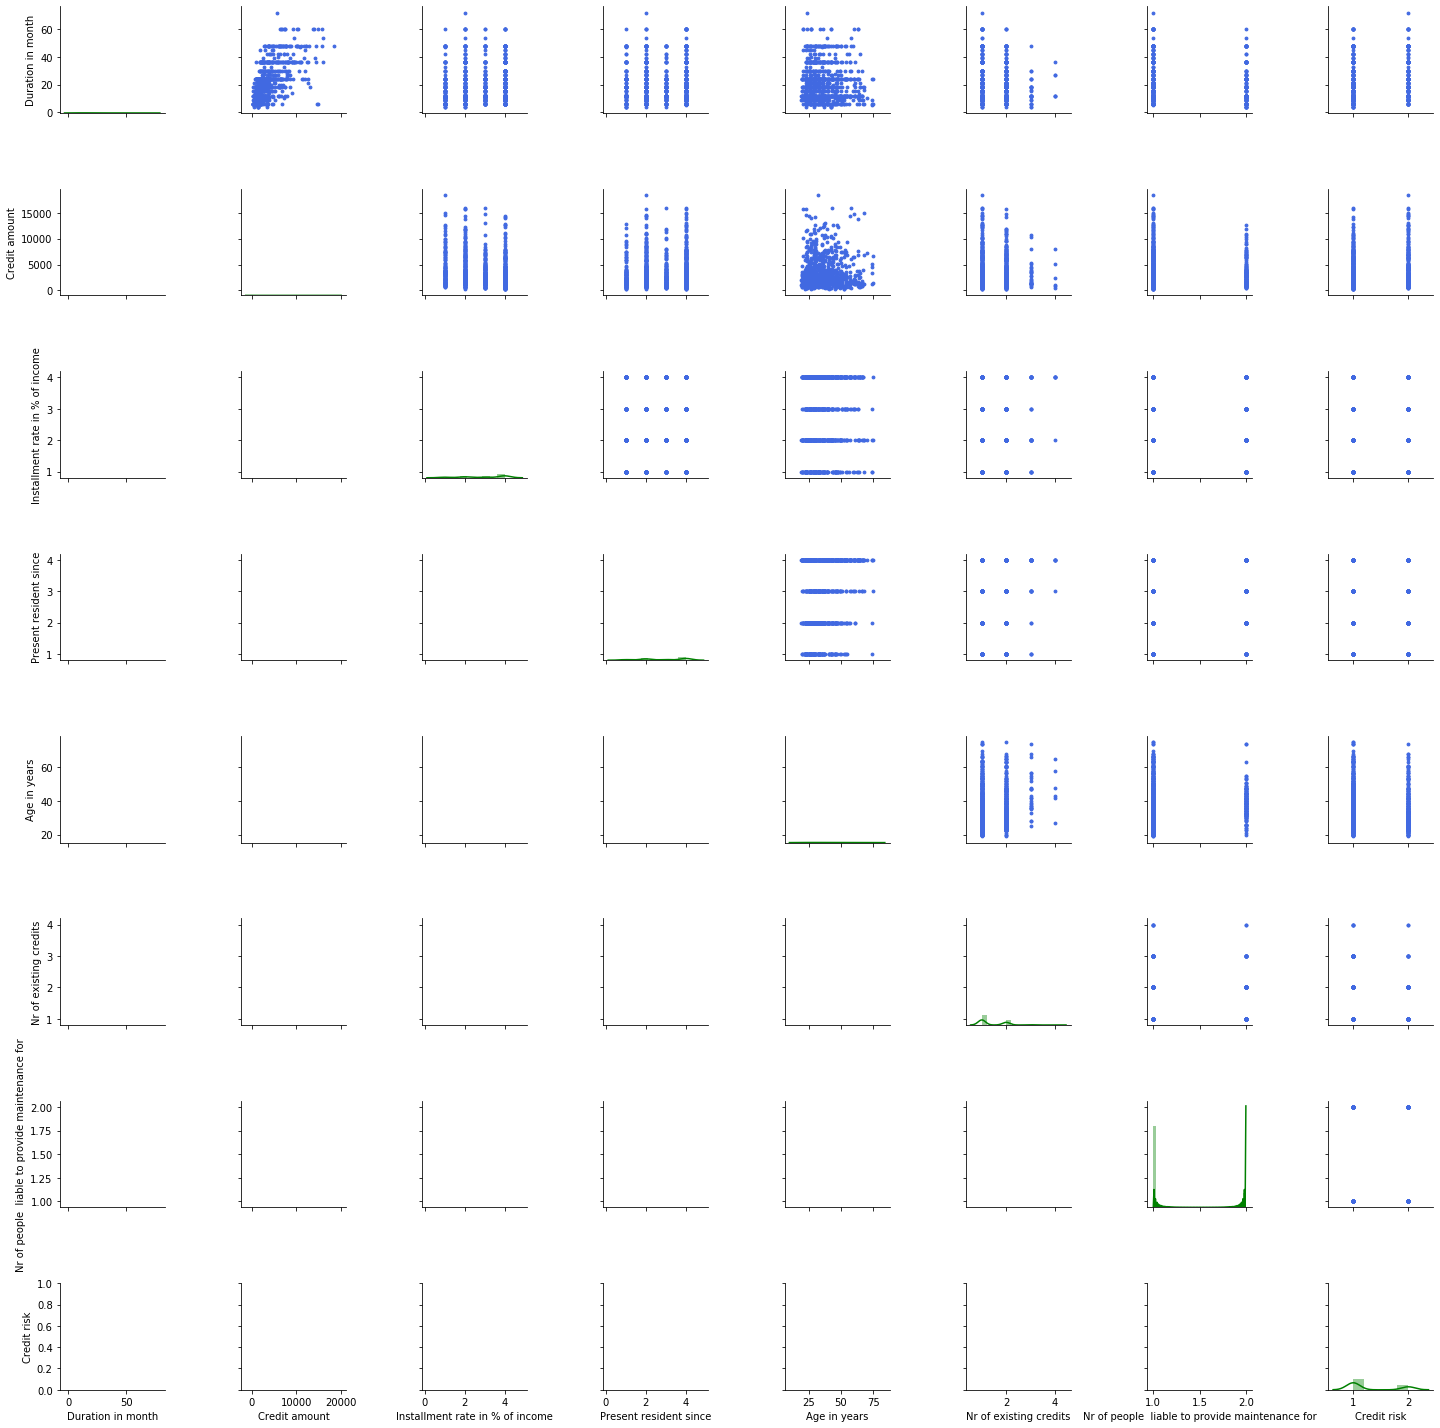

In [11]:
# Initial check of data graphically
g = sns.PairGrid(
    pd.DataFrame(
        df.select_dtypes(include="int64"),
        columns=df.select_dtypes(include="int64").columns,
    )
)
g.map_upper(plt.scatter, color="RoyalBlue", s=8)
g.map_diag(sns.distplot, color="Green")

In [12]:
for col in df.select_dtypes(include='int64'): #prints unique values in int64 category
    print(df[col].unique())

[ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392  6260  7855  1680  3578  7174  2132  4281  2366  1835  3868
  1768   781  1924  2121   701   639  1860  3499  8487  6887  2708  1984
 10144  1240  8613   766  2728  1881   709  4795  3416  2462  2288  3566
   860   682  5371  15

In [13]:
df['Credit risk'] = df['Credit risk'].astype('category')
df.dtypes

Status of checking account                         category
Duration in month                                     int64
Credit histroy                                     category
Purpose                                            category
Credit amount                                         int64
Savings account/bonds                              category
Present employee since                             category
Installment rate in % of income                       int64
Personal status and sex                            category
Other debtors                                      category
Present resident since                                int64
Property                                           category
Age in years                                          int64
Other installment plans                            category
Housing                                            category
Nr of existing credits                                int64
Employment status                       

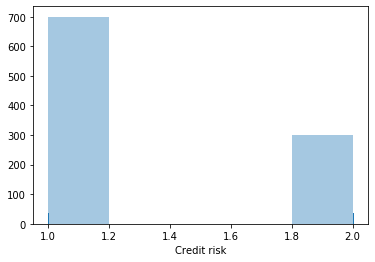

In [14]:
sns.distplot(df['Credit risk'],bins=None, kde=False, rug=True)
# To see if the variable is not biased, tilted towards some points, if it would be. HAVE TO BE "BALANCED"

In [15]:
#FEATURE ENCODING
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = 'ignore')
x_transform = enc.fit_transform(df.select_dtypes(include='category')).toarray()
print (x_transform)
print ('--------------\n')
print (enc.categories_)
print ('--------------\n')
print (enc.get_feature_names()) 

[[1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]
--------------

[array(['A11', 'A12', 'A13', 'A14'], dtype=object), array(['A30', 'A31', 'A32', 'A33', 'A34'], dtype=object), array(['A40', 'A41', 'A410', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48',
       'A49'], dtype=object), array(['A61', 'A62', 'A63', 'A64', 'A65'], dtype=object), array(['A71', 'A72', 'A73', 'A74', 'A75'], dtype=object), array(['A91', 'A92', 'A93', 'A94'], dtype=object), array(['A101', 'A102', 'A103'], dtype=object), array(['A121', 'A122', 'A123', 'A124'], dtype=object), array(['A141', 'A142', 'A143'], dtype=object), array(['A151', 'A152', 'A153'], dtype=object), array(['A171', 'A172', 'A173', 'A174'], dtype=object), array(['A191', 'A192'], dtype=object), array(['A201', 'A202'], dtype=object), array([1, 2], dtype=int64)]
--------------

['x0_A11' 'x0_A12' 'x0_A13' 'x0_A14' 'x1_A30' 'x1_A31' 'x1_A32' 'x1_A33'
 'x1

In [16]:
df_enc = pd.DataFrame(x_transform, columns=enc.get_feature_names())
df_enc.head()

,x0_A11,x0_A12,x0_A13,x0_A14,x1_A30,x1_A31,x1_A32,x1_A33,x1_A34,x2_A40,...,x10_A171,x10_A172,x10_A173,x10_A174,x11_A191,x11_A192,x12_A201,x12_A202,x13_1,x13_2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [17]:
df_final_sklearn = pd.concat(
    [df.select_dtypes(include='int64'), df_enc], axis=1, ignore_index=False
)
df_final_sklearn.head()  # Merges together the int64 columns and the categorical columns with all of the dummy variables

,Duration in month,Credit amount,Installment rate in % of income,Present resident since,Age in years,Nr of existing credits,Nr of people liable to provide maintenance for,x0_A11,x0_A12,x0_A13,...,x10_A171,x10_A172,x10_A173,x10_A174,x11_A191,x11_A192,x12_A201,x12_A202,x13_1,x13_2
0,6,1169,4,4,67,2,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,48,5951,2,2,22,1,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,12,2096,2,3,49,1,2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,42,7882,2,4,45,1,2,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,24,4870,3,4,53,2,2,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [18]:
df_final_sklearn.drop(['x11_A192', 'x12_A202','x13_2'], axis=1, inplace=True)
df_final_sklearn_colname = df_final_sklearn.columns
df_final_sklearn.head()

,Duration in month,Credit amount,Installment rate in % of income,Present resident since,Age in years,Nr of existing credits,Nr of people liable to provide maintenance for,x0_A11,x0_A12,x0_A13,...,x9_A151,x9_A152,x9_A153,x10_A171,x10_A172,x10_A173,x10_A174,x11_A191,x12_A201,x13_1
0,6,1169,4,4,67,2,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,48,5951,2,2,22,1,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,12,2096,2,3,49,1,2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3,42,7882,2,4,45,1,2,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,24,4870,3,4,53,2,2,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [26]:
df_enc_pd = pd.get_dummies(df.select_dtypes(include="category"), drop_first=True)
print(df_enc_pd.head())

   Status of checking account_A12  Status of checking account_A13  \
0                               0                               0   
1                               1                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   Status of checking account_A14  Credit histroy_A31  Credit histroy_A32  \
0                               0                   0                   0   
1                               0                   0                   1   
2                               1                   0                   0   
3                               0                   0                   1   
4                               0                   0                   0   

   Credit histroy_A33  Credit histroy_A34  Purpose_A41  Purpose_A410  \
0                   0                   1         

In [22]:
df_enc_pd_target = pd.get_dummies(df["Credit risk"])

In [23]:
df_enc_pd_target.rename(columns={1: "Credit risk_1", 2: "Credit risk_0"}, inplace=True)
print(df_enc_pd_target.head())

Credit risk  Credit risk_1  Credit risk_0
0                        1              0
1                        0              1
2                        1              0
3                        1              0
4                        0              1


In [27]:
df_final_pd = pd.concat(
    [
        df.select_dtypes(include="int64"),
        df_enc_pd.iloc[:, :-1],
        df_enc_pd_target.iloc[:, 0],
    ],
    axis=1,
    ignore_index=False,
)
df_final_pd.head()

,Duration in month,Credit amount,Installment rate in % of income,Present resident since,Age in years,Nr of existing credits,Nr of people liable to provide maintenance for,Status of checking account_A12,Status of checking account_A13,Status of checking account_A14,...,Other installment plans_A142,Other installment plans_A143,Housing_A152,Housing_A153,Employment status_A172,Employment status_A173,Employment status_A174,Telephone nr_A192,Foreign worker?_A202,Credit risk_1
0,6,1169,4,4,67,2,1,0,0,0,...,0,1,1,0,0,1,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,0,...,0,1,1,0,0,1,0,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,1,1,0,1,0,0,0,0,1
3,42,7882,2,4,45,1,2,0,0,0,...,0,1,0,1,0,1,0,0,0,1
4,24,4870,3,4,53,2,2,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [29]:
x = df_final_pd.iloc[:, :-1].values
y = df_final_pd.iloc[:, -1].values
print (x)
print (y)
df_final_pd.dtypes

[[   6 1169    4 ...    0    1    0]
 [  48 5951    2 ...    0    0    0]
 [  12 2096    2 ...    0    0    0]
 ...
 [  12  804    4 ...    0    0    0]
 [  45 1845    4 ...    0    1    0]
 [  45 4576    3 ...    0    0    0]]
[1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 0 1 1 0 1 1

Duration in month                                  int64
Credit amount                                      int64
Installment rate in % of income                    int64
Present resident since                             int64
Age in years                                       int64
Nr of existing credits                             int64
Nr of people  liable to provide maintenance for    int64
Status of checking account_A12                     uint8
Status of checking account_A13                     uint8
Status of checking account_A14                     uint8
Credit histroy_A31                                 uint8
Credit histroy_A32                                 uint8
Credit histroy_A33                                 uint8
Credit histroy_A34                                 uint8
Purpose_A41                                        uint8
Purpose_A410                                       uint8
Purpose_A42                                        uint8
Purpose_A43                    

In [51]:
# Logistic regression
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/5, random_state = 0)

In [54]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='liblinear').fit(x, y)

In [55]:
print("Predicted label/traget:\n")
print(clf.predict(x))
print("--------------\n")

print("Predicted probability of label/traget: \n")
print(clf.predict_proba(x))
print("--------------\n")

print("Estimated coefficients and intercept/bias terms: \n")
print(clf.coef_)
print(clf.intercept_)

print("The mean accuracy on the given test data and labels: \n")
print("--------------\n")
print(clf.score(x, y))

Predicted label/traget:

[1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1
